In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr
from scipy.spatial import distance
# from scipy.spatial
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess 
from skmisc.loess import loess
%matplotlib inline
from itertools import combinations
from itertools import chain
from itertools import product
import statsmodels
from sklearn.manifold import TSNE
import umap

from adjustText import adjust_text

from multiprocessing import Pool
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
# sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
# from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
graphs_path = '../code/graphs.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
sys.path.append(os.path.dirname(os.path.expanduser(graphs_path)))
import tools
import graphs
from tools import mutant_colorset
from tools import condition_colorset
from tools import renamed_conditions

In [3]:
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')

sorted_m3_cols =   ['M3_Batch_23_fitness', '19_fitness', 'M3_Batch_18_fitness',
       'M3_Batch_20_fitness', 'M3_Batch_3_fitness', 'M3_Batch_13_fitness',
       'M3_Batch_6_fitness', '1BB_M3_fitness', 'M3_Batch_21_fitness']

sorted_nonm3_cols = ['1BB_1.4%Gluc_fitness', 'Ferm_44hr_Transfer_fitness',
       '1BB_1%Gly_fitness', '1BB_1.8%Gluc_fitness', '1BB_0.5%Raf_fitness',
       'Geldanamycin8.5uM_fitness', 'Ferm_40hr_Transfer_fitness',
       '1BB_Baffle_fitness', '1.5%_fitness', 'DMSO_fitness',
       '1BB_1%Raf_fitness', '1.7%_fitness', '1.6%_fitness',
       'Ferm_50hr_Transfer_fitness', '1.4%_fitness', '1BB_2ugFlu_fitness',
       'Ferm_54hr_Transfer_fitness', 'Resp_3Day_Transfer_fitness',
       '1BB_17uMGdA_fitness', '1.8%_fitness',
       'Resp_24hr_Transfer_fitness', '1BB_1%EtOH_fitness',
       '1BB_8.5uMGdA_fitness', '1BB_SucRaf_fitness', '2.5%_fitness',
       'Resp_4Day_Transfer_fitness', 'Resp_5Day_Transfer_fitness',
       '1BB_0.2MNaCl_fitness', '1BB_0.2MKCl_fitness',
       '1BB_0.5ugFlu_fitness', 'Ben0.4_fitness', 'Ben2_fitness',
       'Resp_6Day_Transfer_fitness', 'Resp_7Day_Transfer_fitness',
       '1BB_0.5MKCl_fitness', '1BB_0.5MNaCl_fitness']

first_nonsubtle = 16


There are two things we can do to assess how robust the conclusion that the extra 5 components represent real signal.

(1) We can permute the values of all the mutants (and conditions?) in the 5-9 components. If it's true that just having extra dimensions to play with increases predictive power, then there should be an improvement in the new conditions here.

(2) We can change the specific mutants that are in our training and testing sets - if this structure is specific to these mutants, then the signal we see should change. Similarly, we can slightly alter the composition of these sets (slightly more or fewer mutants per gene) to see if this qualitatively changes our results.

## Permuting latent components

3 10 0.08333333333333333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


1 0.5058616230157469
2 0.7229870010959422
3 0.7433710190942989
4 0.7516850997962058
5 0.6915202338653587
6 0.7552504133140215
7 0.7718434197276548
8 0.7185346408868357
9 0.7228263138561413
10 0.720622600331208
11 0.7195946868079424
12 0.7179048146325565
13 0.6852320256474926
14 0.6793337766335859
15 0.6779047249658415
16 0.6855012135660141
17 0.6928840264204144
18 0.6621903620602113
19 0.6222182324372547
20 0.6171432220010352
21 0.6044026661535037
22 0.6107795784036343
23 0.5955479828794014
24 0.3609654705689034
25 0.12427170041767421
0.00042796903871385997 0.00028318983789477357 0.6617063672311918
9
1 0.510909263805865
2 0.7475118392424749
3 0.7625227062230899
4 0.7693838407253925
5 0.7717940608661054
6 0.7839104925725519
7 0.8050896445634728
8 0.8032920106631172
9 0.807310264945882
10 0.8076313720325283
11 0.8067055173093872
12 0.790314231057073
13 0.7919798038314576
14 0.7909449207563102
15 0.7797803427934699
16 0.7650219834762337
17 0.7584605120178056
18 0.7212988903513191
19 0.717

16 0.7962101788059877
17 0.7915850715801674
18 0.7847931395047393
19 0.776550020251592
20 0.7577647407856667
21 0.746890657995219
22 0.7167666745285426
23 0.7028481108298799
24 0.6966782118847507
25 0.690546330688115
0.0003617381688281743 0.00025070488128528084 0.6930562016649277
9
1 0.5241955803568614
2 0.7676062474404823
3 0.7719554377692002
4 0.7738755864404006
5 0.7585032630352748
6 0.7651093311562938
7 0.7772125415182268
8 0.8422400135753014
9 0.8428456980838752
10 0.841226558756698
11 0.8420501880313804
12 0.8400111094925017
13 0.8382027207810607
14 0.8366888228999645
15 0.8411765681555021
16 0.8425708476209015
17 0.8328152174621474
18 0.8310985755913057
19 0.8135202757966965
20 0.8109496251279074
21 0.8291977784268505
22 0.8287407489250201
23 0.818434350002458
24 0.8070494258812645
25 0.8062517421734237
0.00035372613486090533 0.0002498888335046496 0.706447188593833
9
1 0.5240263697477242
2 0.7706855272782731
3 0.775173579924057
4 0.7771534381791196
5 0.7709121274130268
6 0.78339

1 0.510317882318092
2 0.7013627421475291
3 0.6867265830173479
4 0.6864701808807909
5 0.6862769252724491
6 0.712273387049809
7 0.7301660852759961
8 0.7859371517676014
9 0.778042066502281
10 0.7820634010141478
11 0.7821767534054453
12 0.782175028096269
13 0.7788861500882538
14 0.7662520870114605
15 0.7766282584117328
16 0.7750045286738007
17 0.7657278721873282
18 0.7607367052195455
19 0.7640966051166417
20 0.738324991807616
21 0.7283489912692531
22 0.7280465965893436
23 0.7288452886944126
24 0.6215640720845348
25 0.5884703163353082
0.00040411962240684697 0.00029177795940847986 0.7220088885333381
9
10 5 0.6666666666666666
1 0.455996108021805
2 0.700742075314357
3 0.7131471162404259
4 0.7034403826385132
5 0.6252965896484861
6 0.6768622465912224
7 0.7284850113511105
8 0.7618471431084143
9 0.7487149557675901
10 0.7196398417192054
11 0.7303365632625951
12 0.7402349308032089
13 0.7364258284435502
14 0.7096514988079882
15 0.6719276733706772
16 0.6585415279405813
17 0.611071236058726
18 0.531964

16 0.7479037911069795
17 0.746274833712625
18 0.7528535194212754
19 0.706962708891336
20 0.707117042396511
21 0.6987466806489416
22 0.6943527521768069
23 0.6397838793258412
24 0.6370657208517583
25 0.5502397159646211
0.0003537280914071077 0.0002535640750110623 0.7168332998445236
9
1 0.498160614849942
2 0.74216859879002
3 0.7497390107513408
4 0.7560942736163133
5 0.7534066439815477
6 0.7532864354803024
7 0.7840593469070312
8 0.8086667771427404
9 0.8223729596326484
10 0.8219408470444599
11 0.8336151777288863
12 0.8313813741207314
13 0.825400153721333
14 0.8056164057527864
15 0.8014612727064465
16 0.7894623077216472
17 0.7806379352062434
18 0.7728619785672974
19 0.7803216223470657
20 0.7658910524218816
21 0.7131191497346865
22 0.6975882416079789
23 0.6903612454755157
24 0.6702044336708919
25 0.6164528544879397
0.000375426997503591 0.0002664551655942928 0.7097389568840055
9
1 0.5142770955128693
2 0.7648372139748704
3 0.7724325107718192
4 0.7596168370536526
5 0.7386842524324724
6 0.74215635

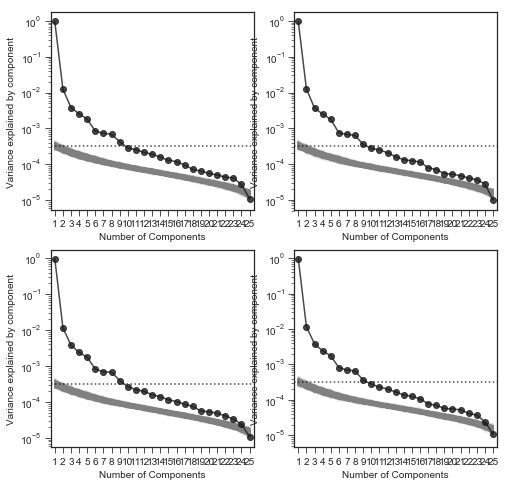

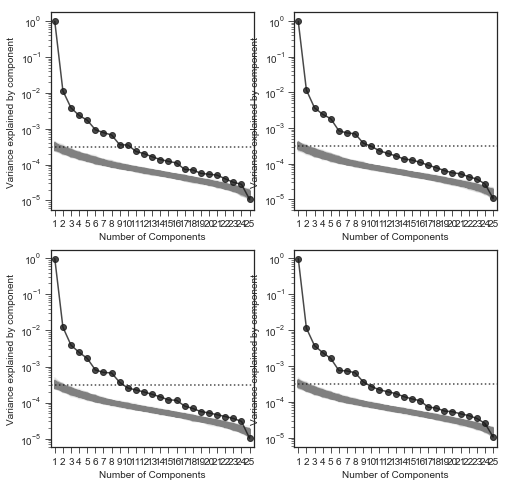

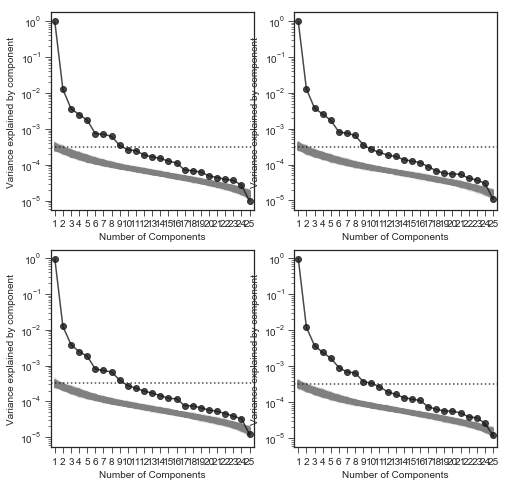

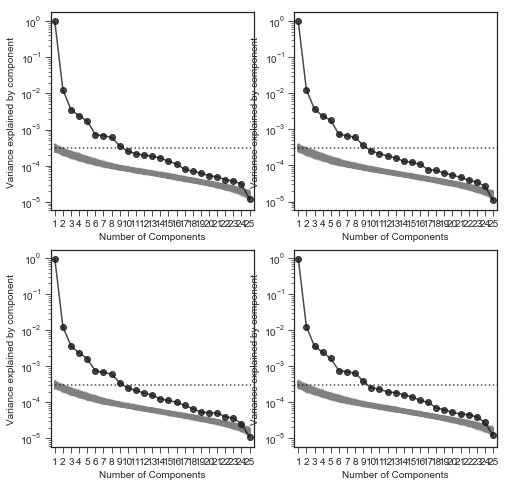

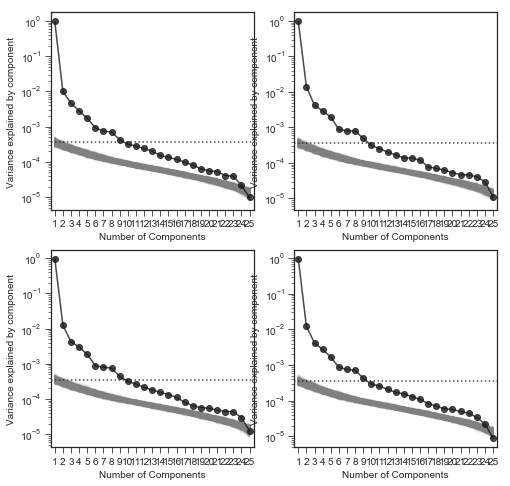

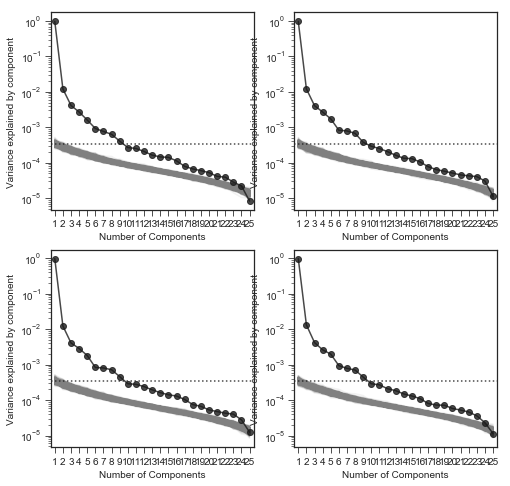

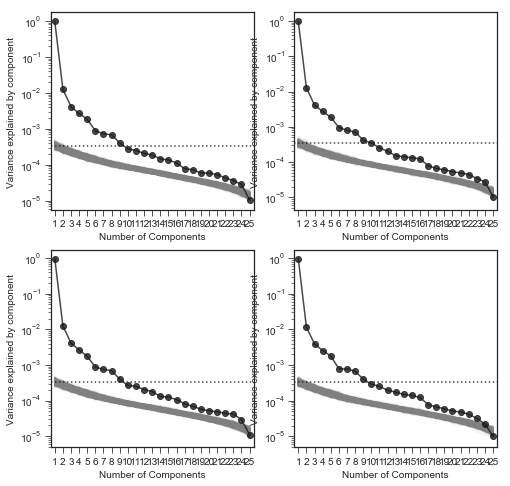

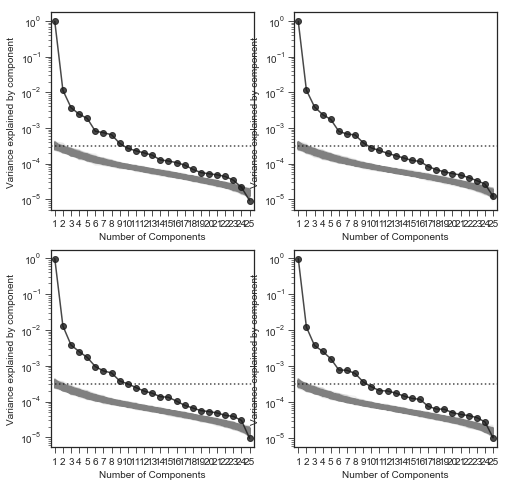

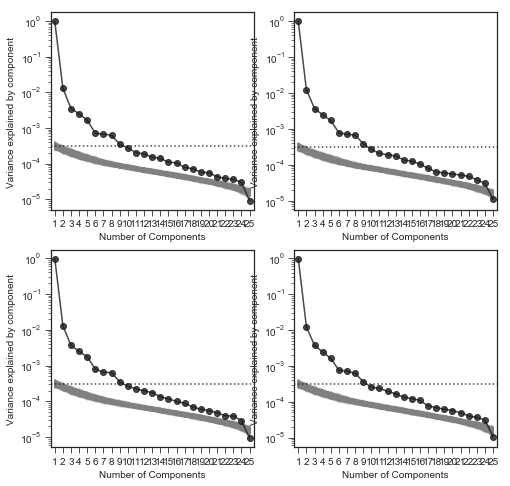

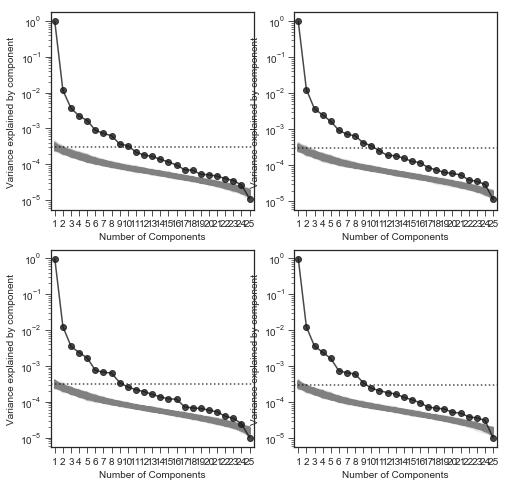

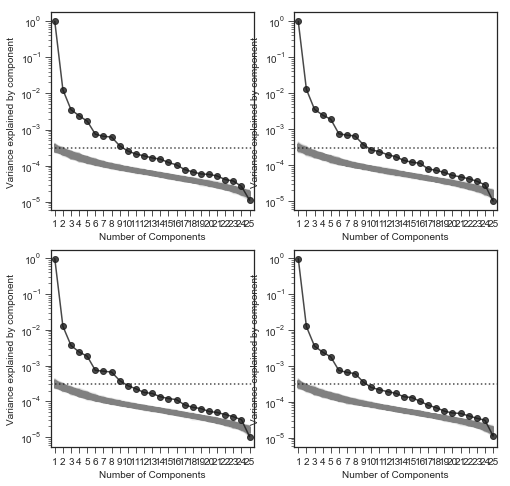

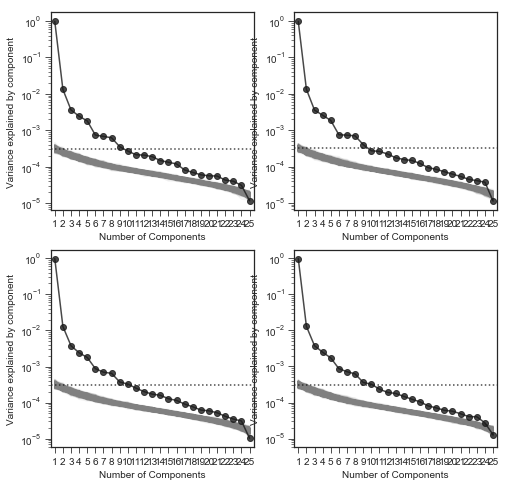

In [5]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

datasets = {}


gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid','ExpNeutral']

n_trials = 4

# param_list = [(4,10),(3,10),(5,10),(4,5),(3,5),(5,5),(4,15),(3,15),(5,15)]
param_list = [(3,10),(4,10),(5,10),(10,10),(3,5),(4,5),(5,5),(10,5),(3,15),(4,15),(5,15),(10,15)]



for m,(max_train,max_test) in enumerate(param_list):
    print(max_train,max_test,((m+1)/(len(param_list))))
    
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.title(f'{(max_train,max_test)}')
    
    datasets[f'{(max_train,max_test)}'] = {}
    
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
#         max_train = 4
#         max_test = 10

        training_bcs, testing_bcs = tools.select_train_test_mutants(this_data,max_train=max_train,max_test=max_test)

        datasets[f'{(max_train,max_test)}'][i] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                      training_bcs,testing_bcs,gene_list,fixed_mutant_sets=True)


        these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

        this_fitness = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][these_cols].values

        this_error = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

        tools.svd_noise_comparison_figure(ax,this_fitness,this_error,1000,yscale='log')

#     plt.savefig('')


([<matplotlib.axis.XTick at 0x188dfb5c0>,
 <a list of 12 Text xticklabel objects>)

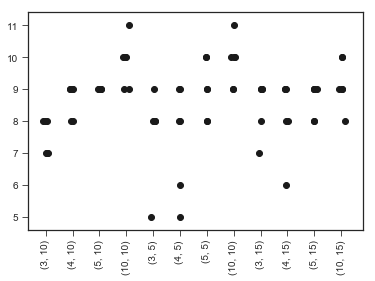

In [116]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
    
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.scatter(tools.jitter_point(m,0.05),model+1,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

([<matplotlib.axis.XTick at 0x1235e8278>,
 <a list of 12 Text xticklabel objects>)

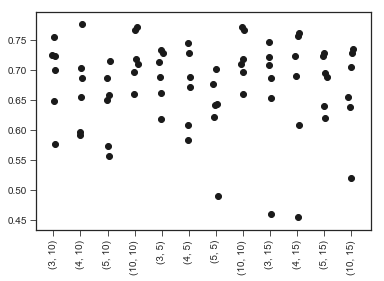

In [115]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
     
        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']


        types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

        new_mut_locs = dataset['mut_locs'][model][test[1]]

        old_cond_locs = dataset['cond_locs'][model][train[0]]

        new_cond_locs = dataset['cond_locs'][model][test[0]]

        these_sigmas = dataset['dimension_weights'][model]
        these_sigmas = these_sigmas[:model+1,:model+1]

        nonsubtle_fit = tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                      np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0]

        plt.scatter(tools.jitter_point(m,0.05),nonsubtle_fit,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

4 0.6995003277918794
9 0.6907695310957808
4 0.6938394713825398
9 0.6903173952584878
4 0.685114357622292
9 0.7039430790086909
4 0.5375155148999242
9 0.620234789563438
4 0.6875746975962318
9 0.7309455156399587
4 0.6762901634532403
9 0.7090805537247679
4 0.7075126835406851
9 0.7071943399838247
4 0.685257254593292
9 0.7357175487773939
4 0.6795456309336492
9 0.7222714925432252
4 0.5819625903477103
9 0.6385251191592767


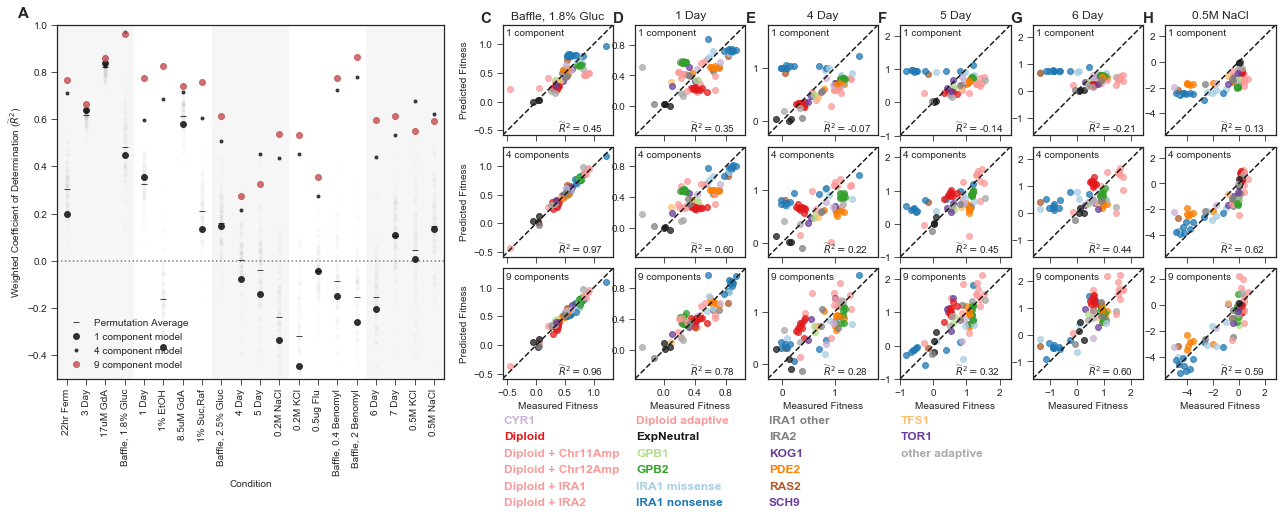

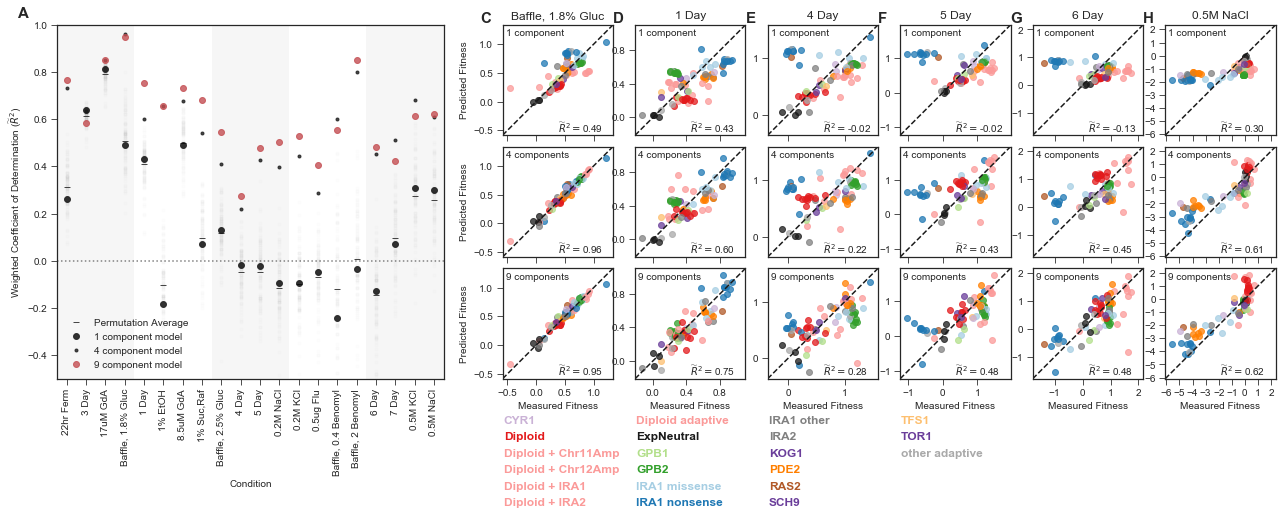

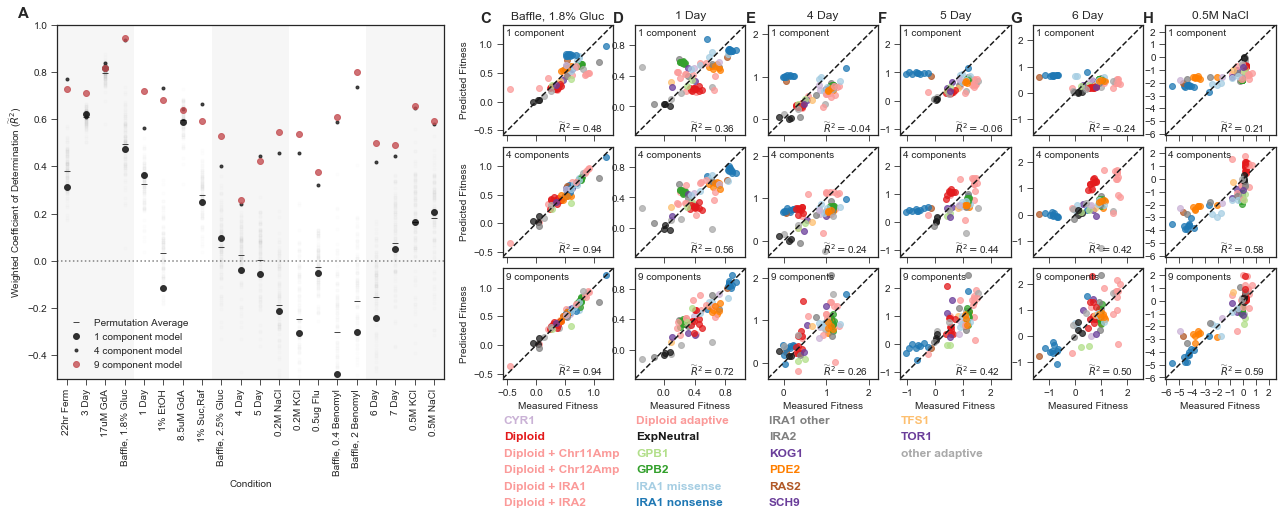

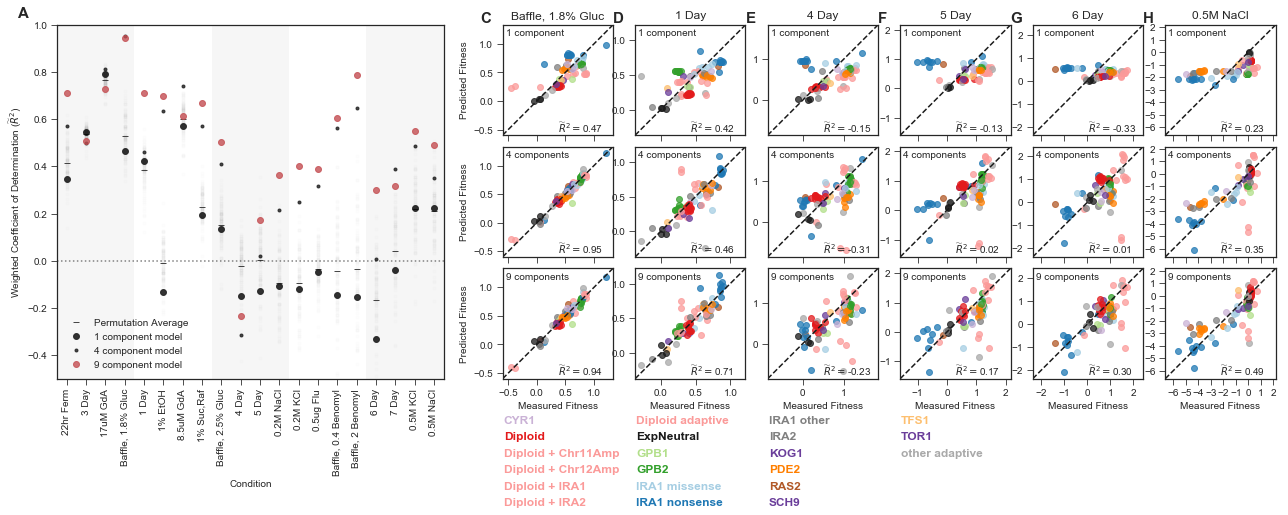

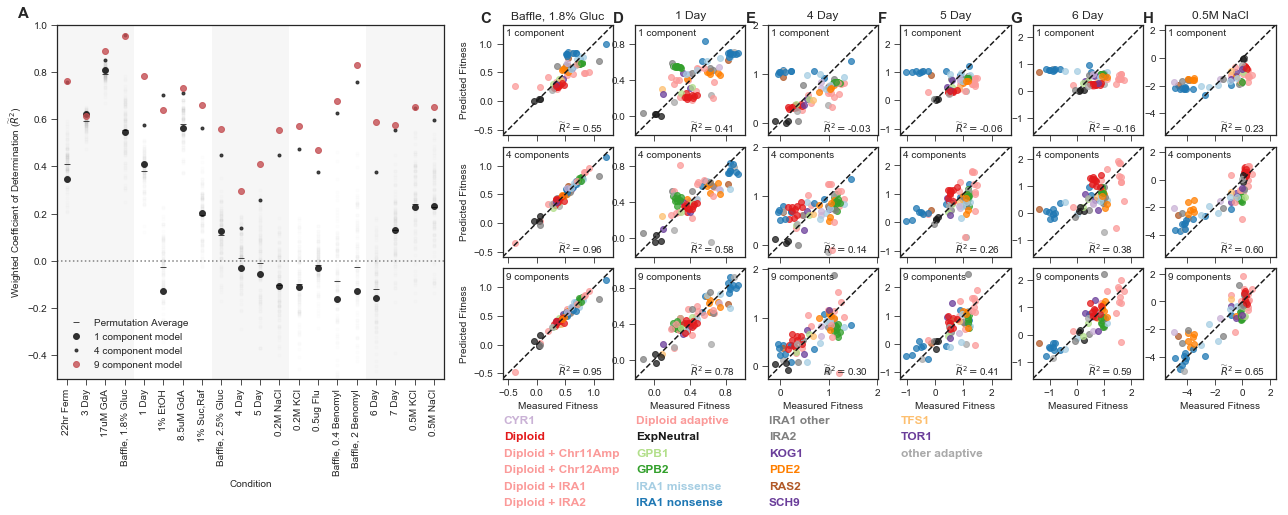

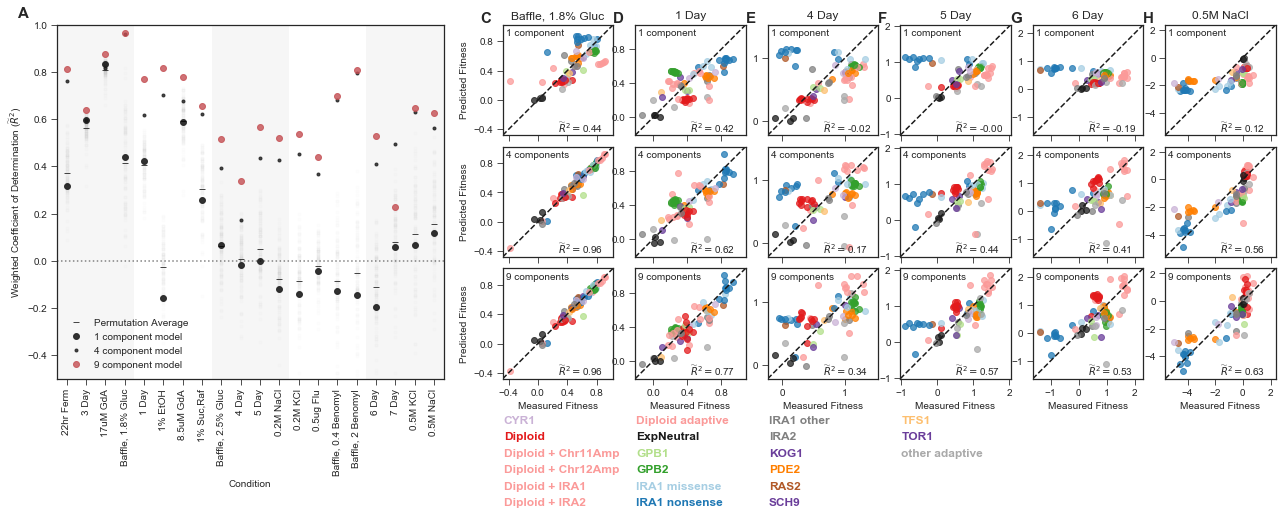

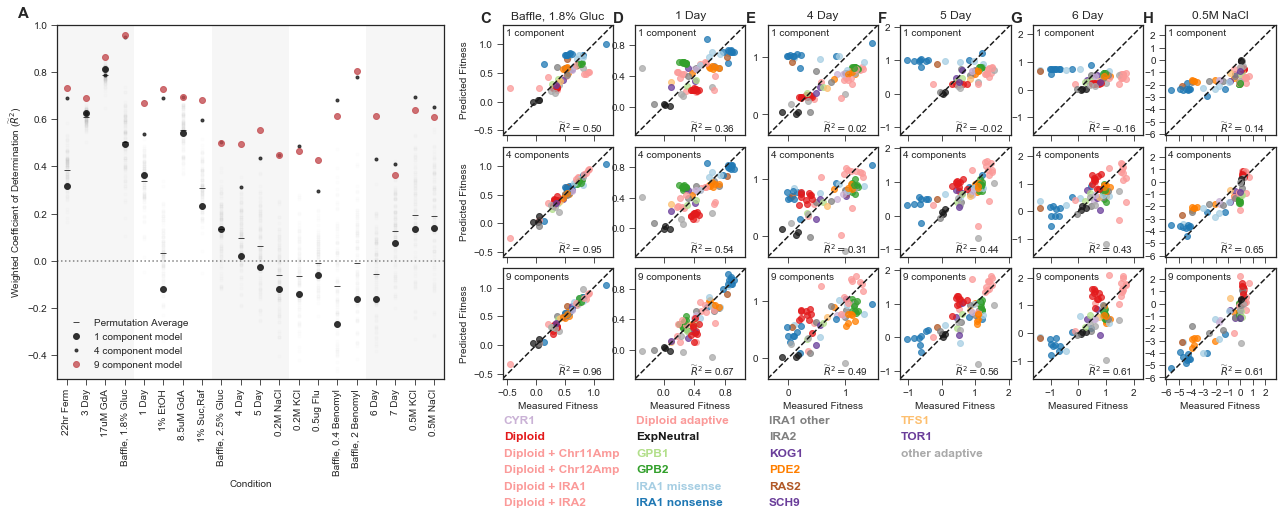

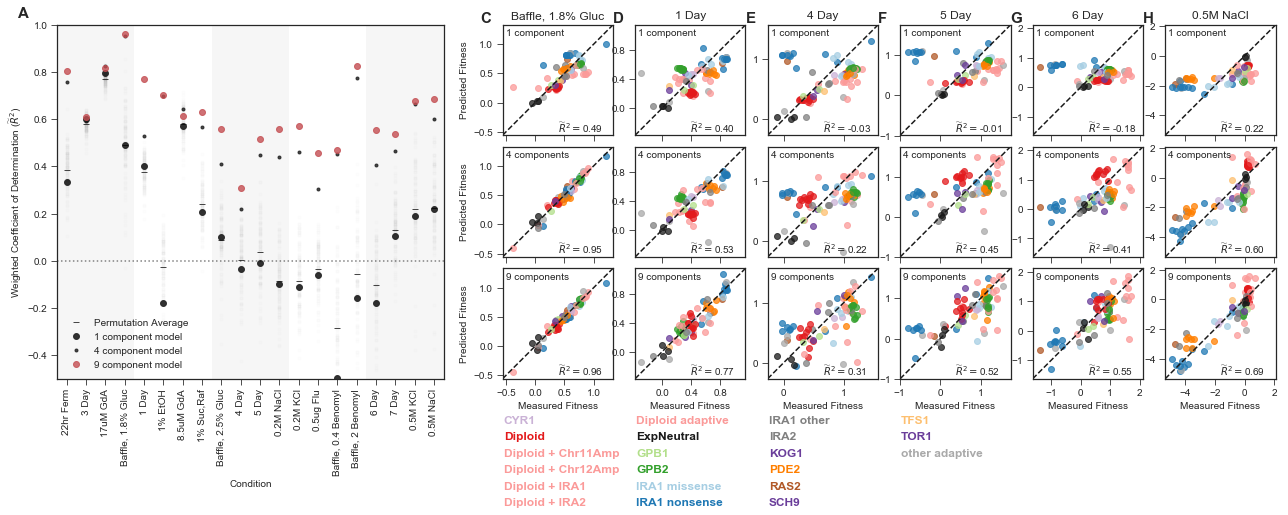

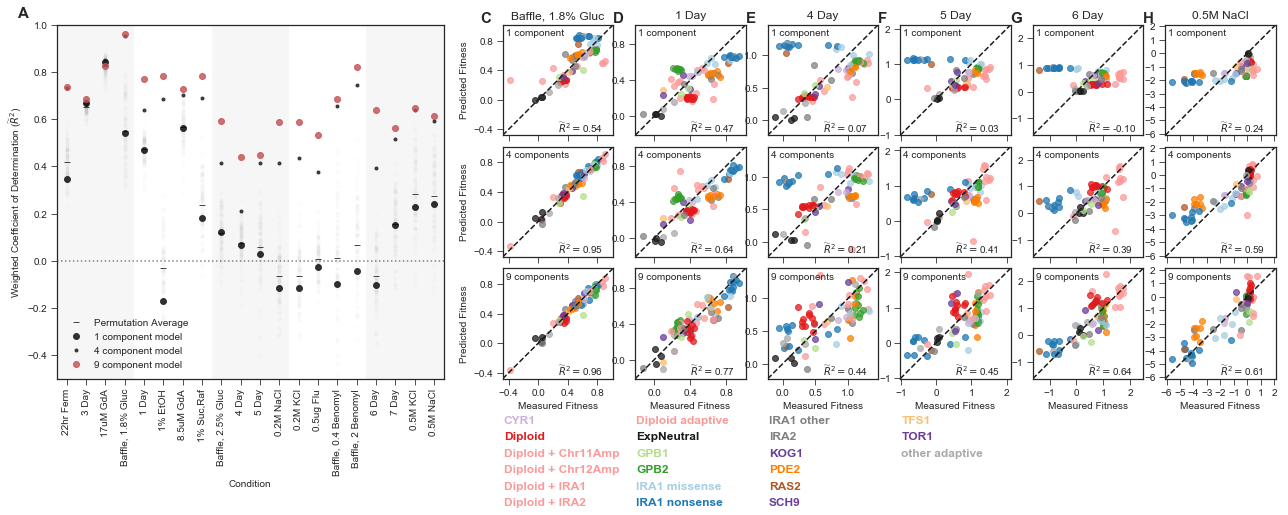

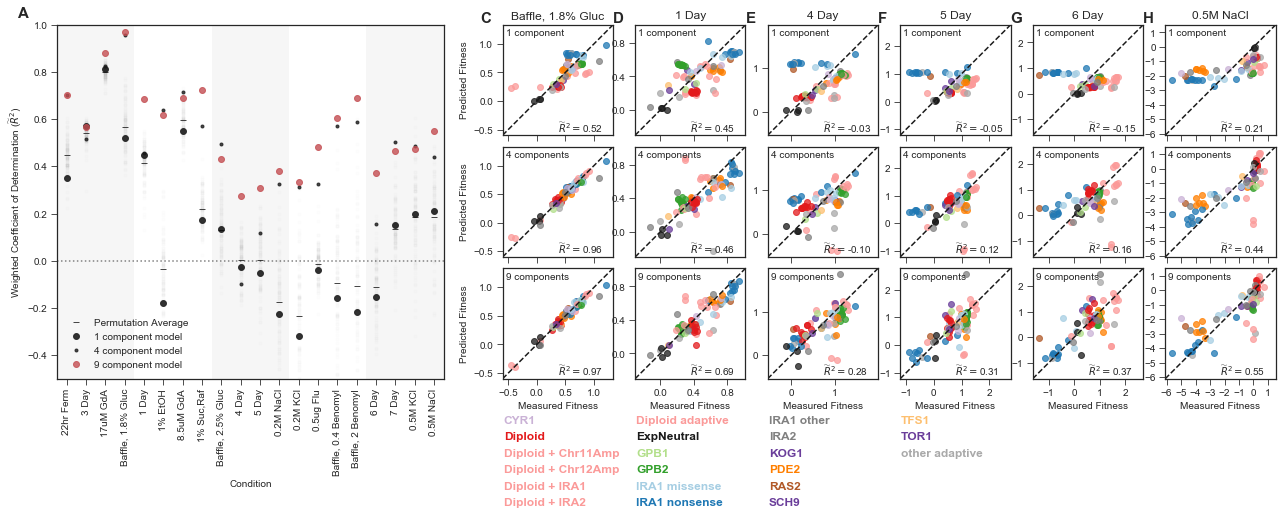

In [10]:
for i in range(n_trials):
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
#     # graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
#     interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
    example_names = ['1.8%','Resp_24hr_Transfer','Resp_4Day_Transfer','Resp_5Day_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']
    
    graphs.Figure4_w_examples(datasets[i],gene_list,this_data,[col + '_fitness' for col in example_names],models=[3,8],weighted=True)
# plt.savefig(f'Figure4_with_prediction_examples_unweighted.pdf',bbox_inches='tight')

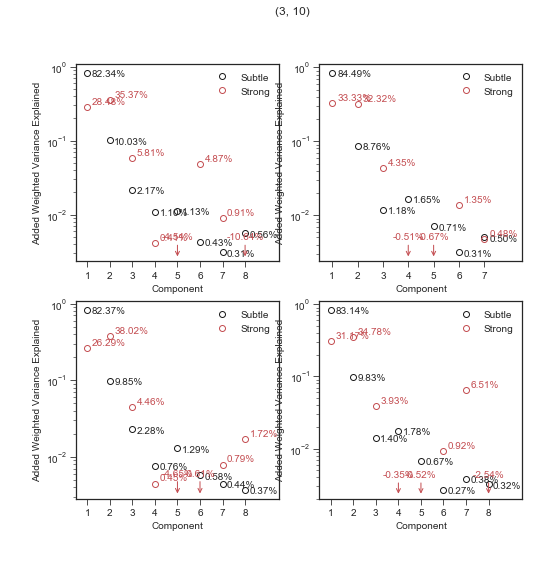

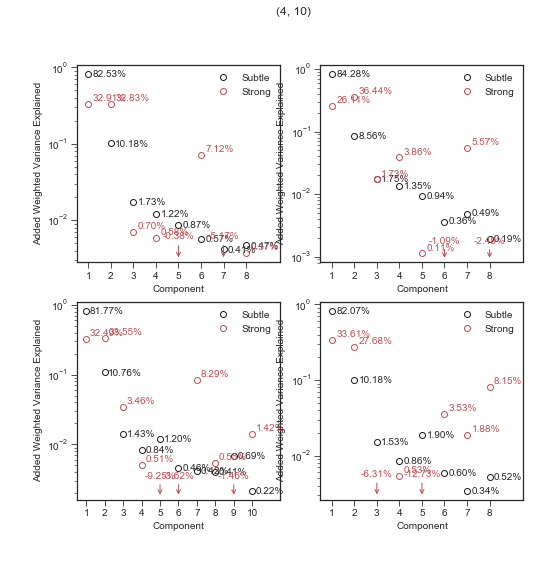

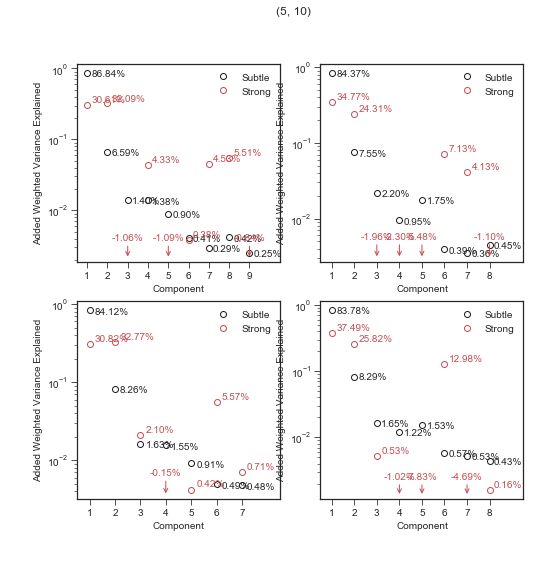

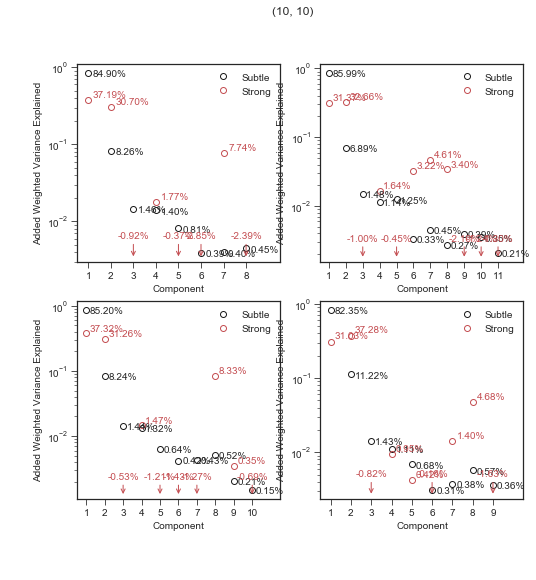

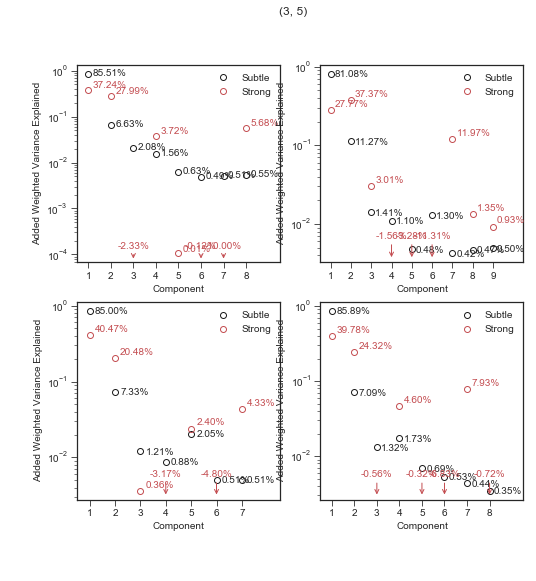

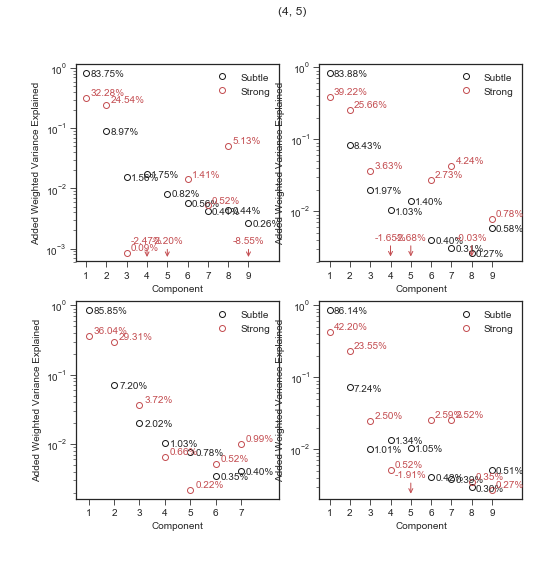

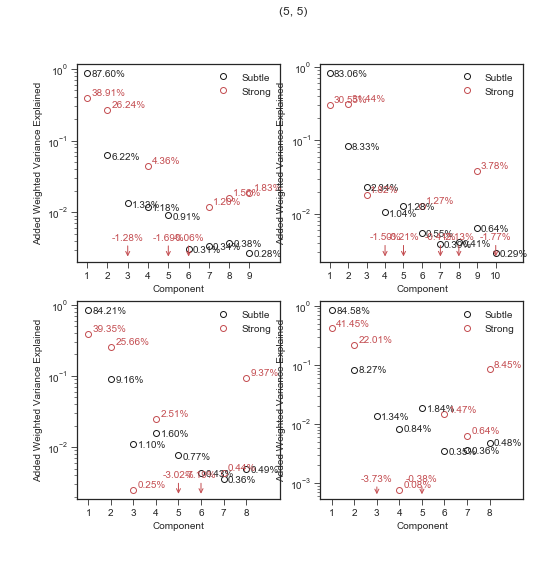

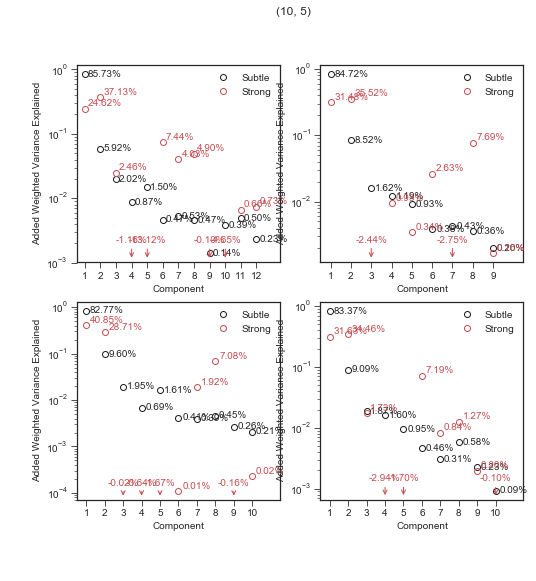

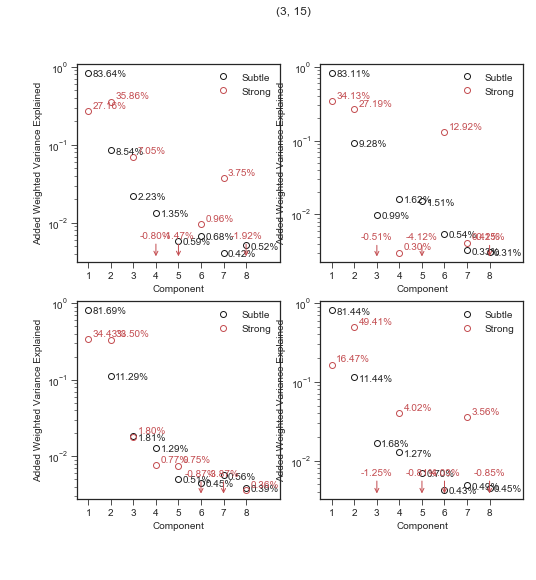

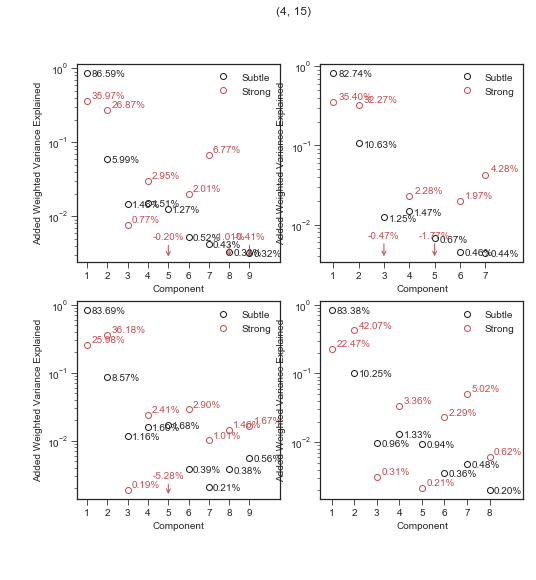

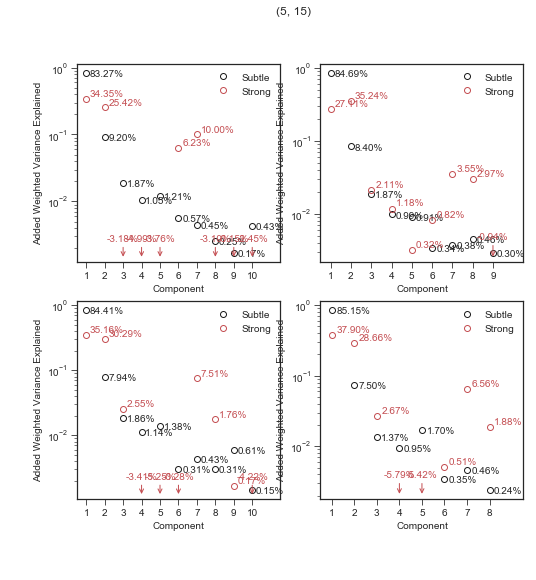

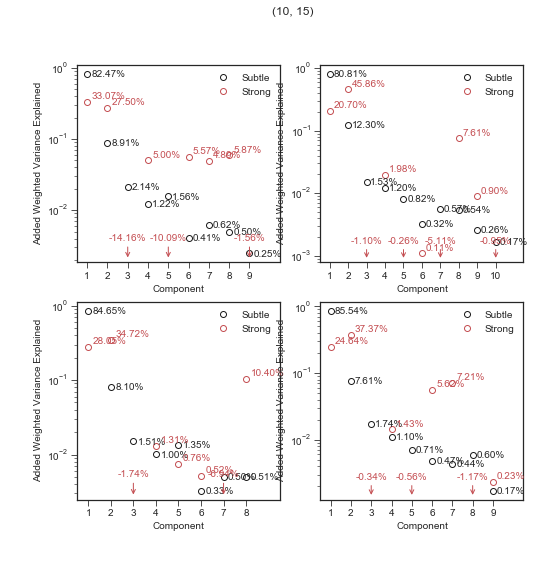

In [6]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


ns_fits = {}
s_fits = {}

for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.suptitle(f'{(max_train,max_test)}')
    
    ns_fits[f'{(max_train,max_test)}'] = {}
    s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
        n_perms = 100
        weighted= True
        ymax = 1.0
        ymin = -1.0

        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']
        
        end = model
        nonsubtle_fits = []
        subtle_fits = []
        overall_subtle = []
        overall_nonsubtle = []
        for model in range(20):
            # this_gene_data = this_data[this_data['barcode'].isin(test_mutant_data)]
            types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

            new_mut_locs = dataset['mut_locs'][model][test[1]]

            old_cond_locs = dataset['cond_locs'][model][train[0]]

            new_cond_locs = dataset['cond_locs'][model][test[0]]

            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            overall_nonsubtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0])

            this_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],test[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[:,i],types)[0] for i in range(new_cond_locs.shape[0])])
            nonsubtle_fits.append(this_sse)
            

            overall_subtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,train[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T)),types)[0])


            subtle_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],train[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T))[:,i],types)[0] for i in range(old_cond_locs.shape[0])])


            subtle_fits.append(subtle_sse)
        
        ns_fits[f'{(max_train,max_test)}'][i] = nonsubtle_fits
        s_fits[f'{(max_train,max_test)}'][i] = subtle_fits
#         end = model

        plt.plot([overall_subtle[0]]+list(np.diff(overall_subtle))[:end],'o',markeredgecolor='k',markerfacecolor='None',label='Subtle')
        plt.ylabel('Added Weighted Variance Explained')
        # plt.yscale('log',basey=10)

        for i,item in enumerate([overall_subtle[0]]+list(np.diff(overall_subtle))[:end]):
        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)
            plt.annotate(xy=(i+0.2,item-0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes)

        plt.plot([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end],'o',markeredgecolor='r',markerfacecolor='None',label='Strong')
        plt.ylabel('Added Weighted Variance Explained')
        plt.yscale('log',basey=10)
        plt.xticks(range(len(overall_subtle[:end+1])),range(1,len(overall_subtle[:end+1])+1))
        plt.xlabel('Component')

        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            plt.annotate(xy=(i+0.2,item+0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r')


        ymin,ymax = plt.ylim()
        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            if item < 0:
                plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r',
                             ha='center',arrowprops=dict(arrowstyle='->',color='r'))
    #             plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s="",transform=plt.gca().transAxes,color='r',
    #                  ha='center',arrowprops=dict(arrowstyle='->',color='r'))

        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)

        plt.xlim(-0.5,end+1.5)
#         plt.title('Contribution of components')
        plt.legend()
    

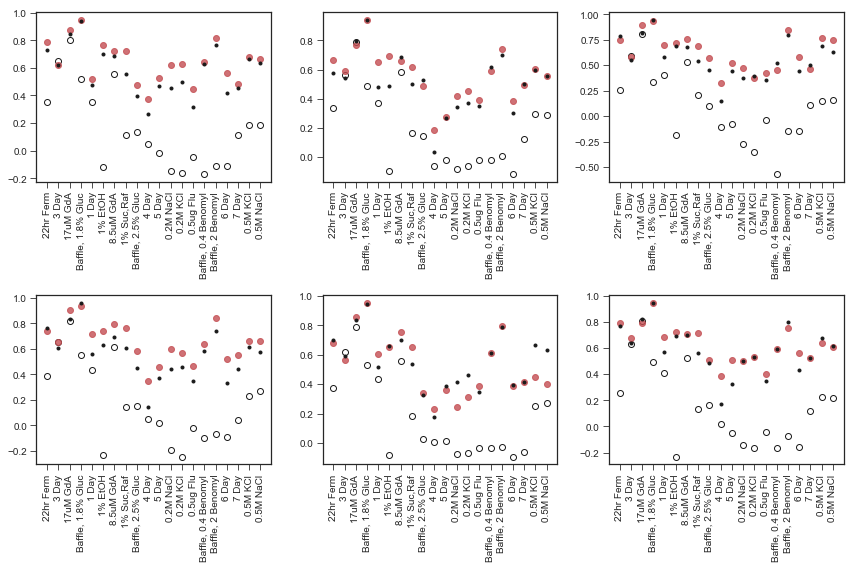

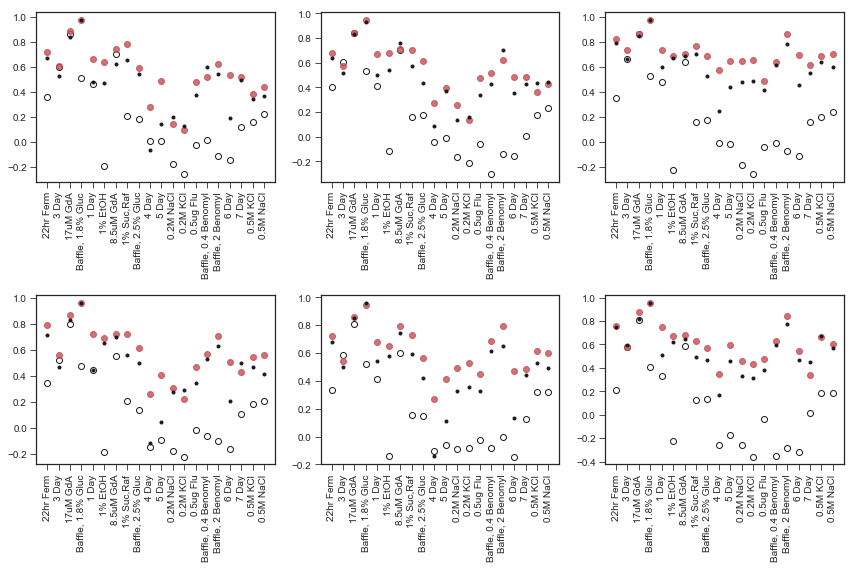

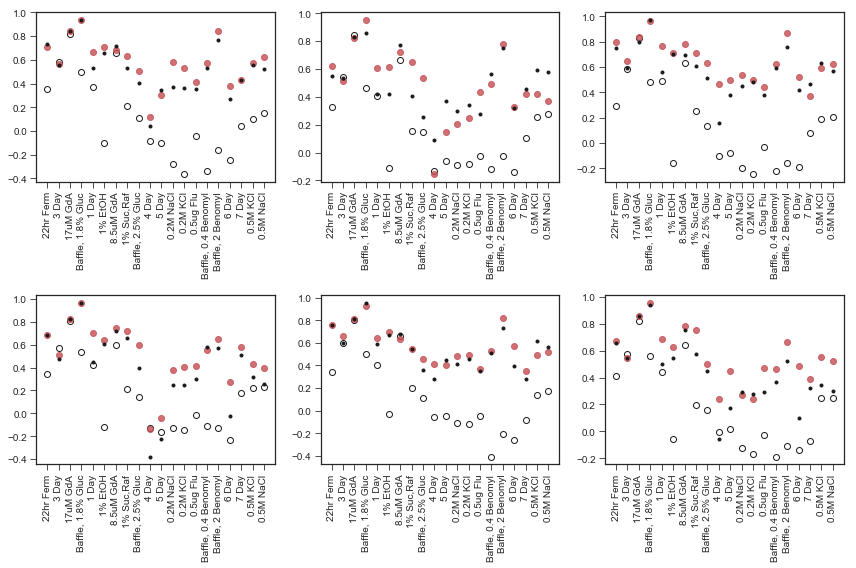

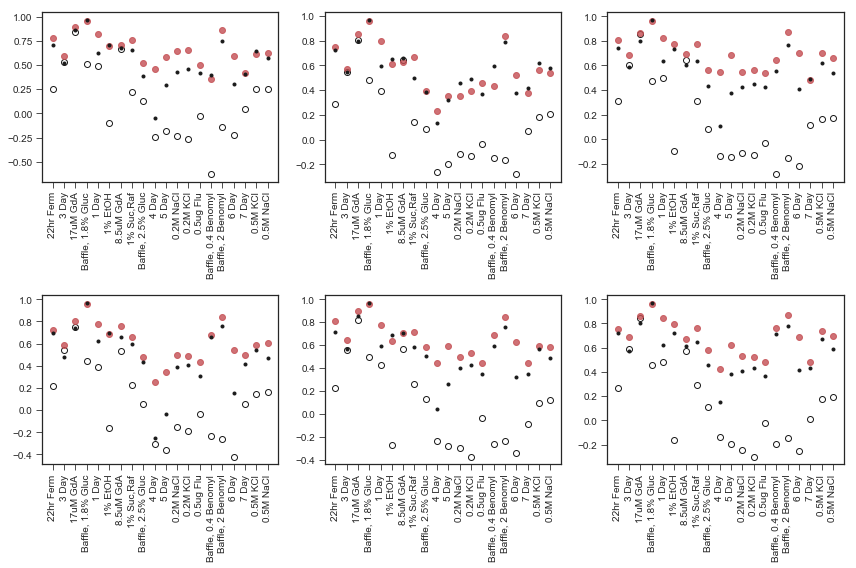

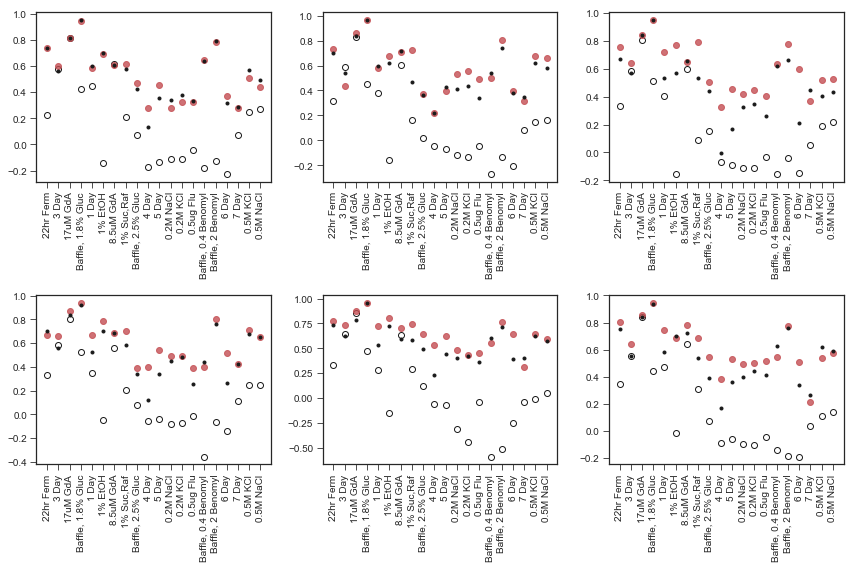

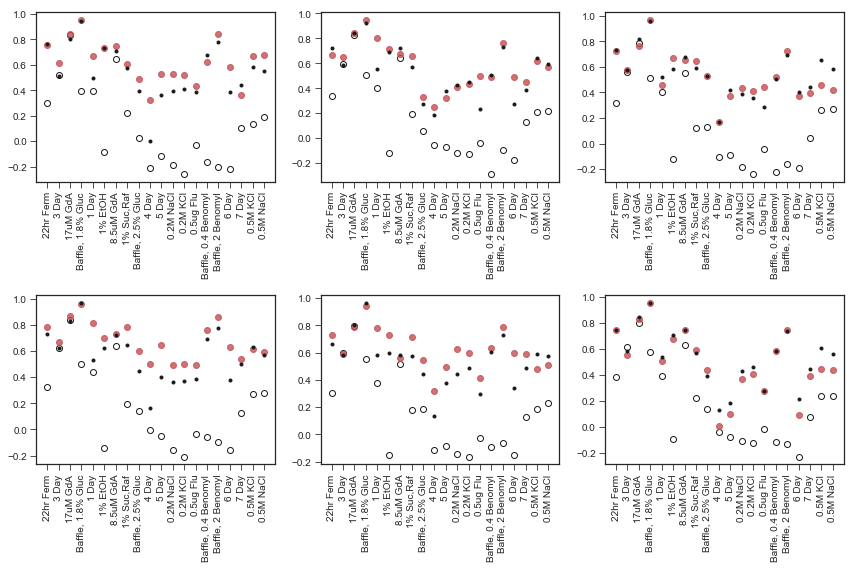

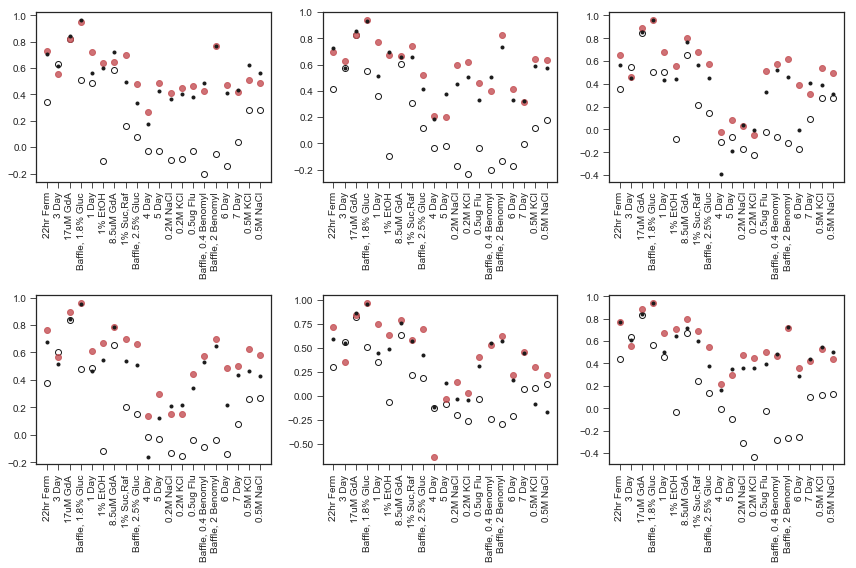

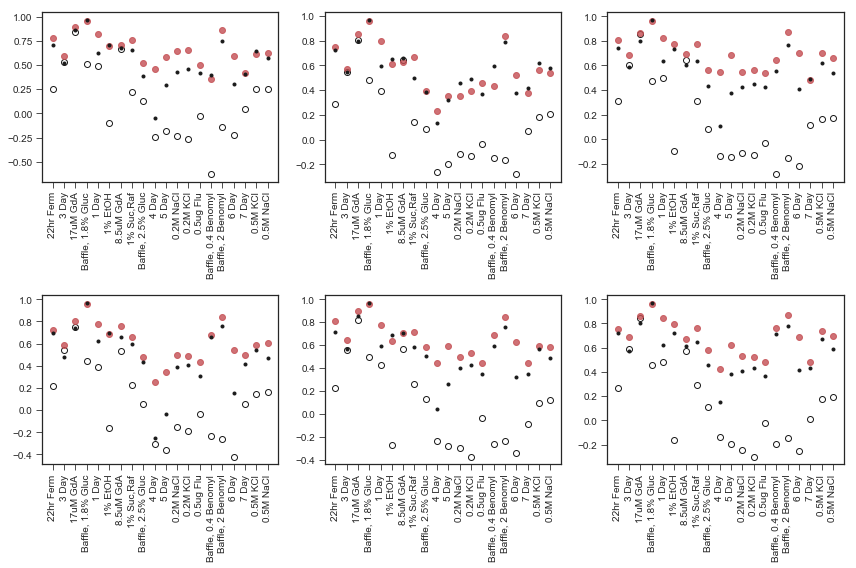

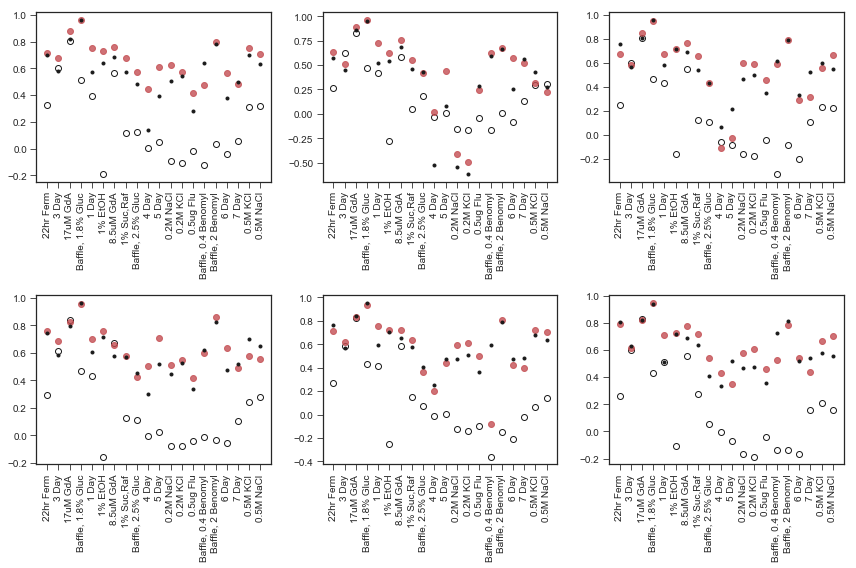

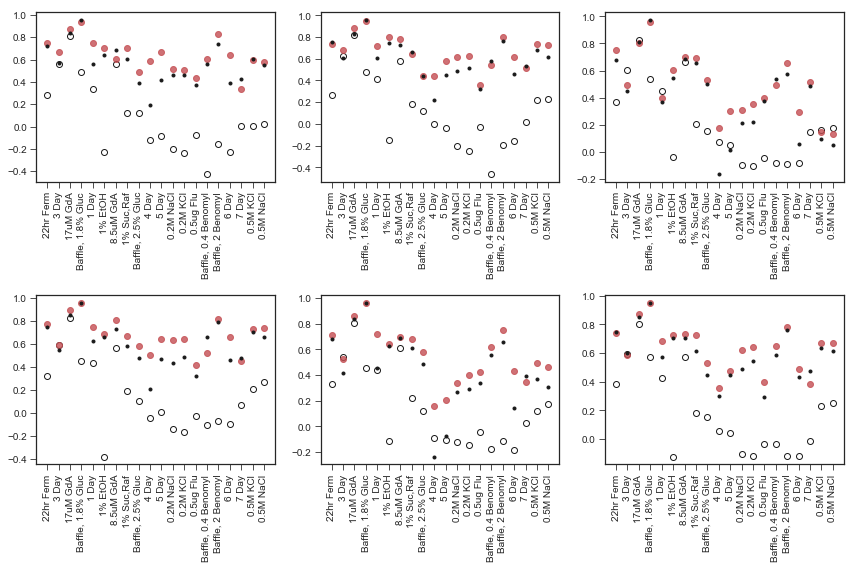

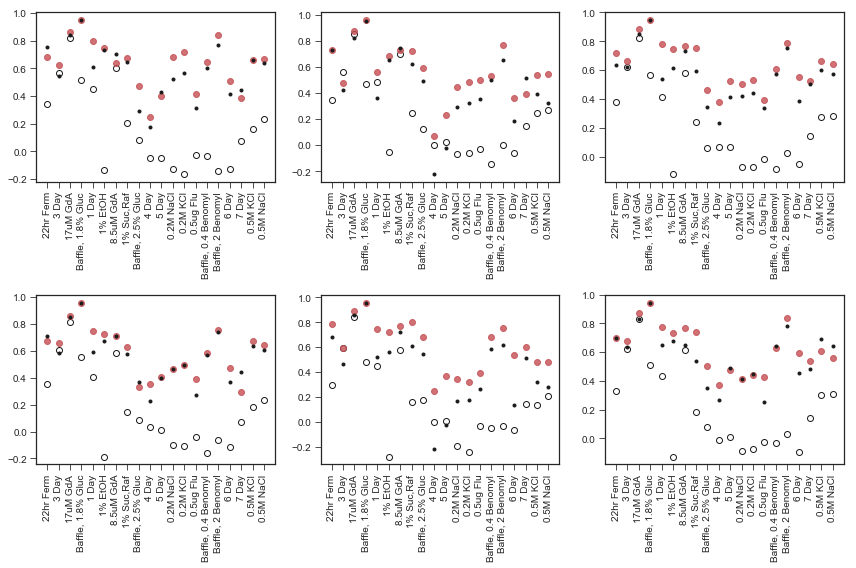

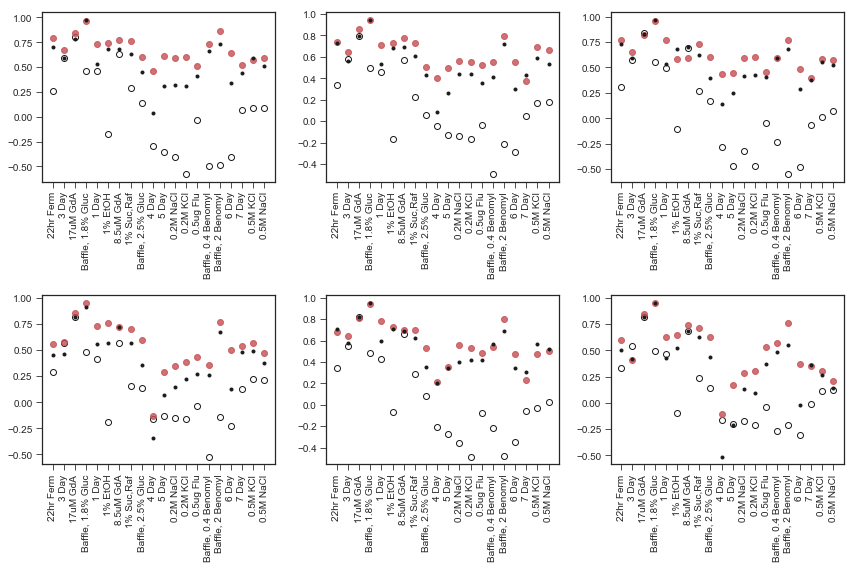

In [118]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    
#     ns_fits[f'{(max_train,max_test)}'] = {}
#     s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][0],'ko',markeredgecolor='k',markerfacecolor='None')
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][model],'ro',alpha=0.8)
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][3],'k.')
        
        plt.xticks(range(len(ns_fits[f'{(max_train,max_test)}'][i][3])),[renamed_conditions[col.replace('_fitness','')] for col in sorted_nonm3_cols[first_nonsubtle:]],rotation=90)
        plt.tight_layout()
        

In [ ]:
dataset = datasets['subtle_to_strong_wothers']
n_perms = 100
weighted= True
ymax = 1.0
ymin = -1.0

all_guesses = dataset['CV_all_guesses']
both_old = dataset['both_old']
dhats = dataset['dhats']
this_fitness = dataset['this_fitness']
this_error = dataset['this_error']
train  = dataset['train']
test = dataset['test']
both_new = dataset['both_new']
guesses = dataset['guesses']
model = dataset['CV_best_rank_index']
test_conditions  = dataset['test_conditions']
train_conditions = dataset['train_conditions']


nonsubtle_fits = []
subtle_fits = []
overall_subtle = []
overall_nonsubtle = []

model_list = [0,]
    model_colors = ['k','lightgray','r']

    all_conditions = train_conditions + test_conditions


    all_bcs = sorted(list(dataset['training_bcs'])+list(dataset['testing_bcs']))

    testing_bcs = list(dataset['testing_bcs'])

    these_bcs = testing_bcs

    these_genes = this_data[this_data['barcode'].isin(these_bcs)]['mutation_type'].values
    gene_bc = np.asarray([f'{gene} ({bc})' for bc,gene in zip(these_bcs,these_genes)])
    gene_bc = np.asarray([f'{gene}' for bc,gene in zip(these_bcs,these_genes)])


    for condition in interesting_conditions:

        condition_loc = np.where(np.isin(all_conditions,condition))[0][0]

        this_f = this_fitness[np.where(np.isin(all_bcs,these_bcs))[0]]
        this_e = this_error[np.where(np.isin(all_bcs,these_bcs))[0]]



        fits = []

        for m,model in enumerate(model_list):

            new_mut_locs = dataset['mut_locs'][model][test[1]]
            old_cond_locs = dataset['cond_locs'][model][train[0]]
            new_cond_locs = dataset['cond_locs'][model][test[0]]   
            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            new_fits = [np.abs(np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[bc,condition_loc-old_cond_locs.shape[0]]-this_f[bc,condition_loc])/this_e[bc,condition_loc] for bc in range(len(these_bcs))]

            sorting  = np.argsort(new_fits)

            fits.append(new_fits)

        data = (np.asarray(fits[1])-np.asarray(fits[2]))/(np.asarray(fits[1]))
        data = (np.asarray(fits[1])-np.asarray(fits[2]))
        data = np.asarray(fits[2])-np.asarray(fits[1])
        sorting = np.argsort(data)
        data = data[sorting]
        sorted_genes = these_genes[sorting]

        plt.figure(figsize=(12,6))
        plt.subplot(211)
        plt.title(renamed_conditions[condition.replace('_fitness','')])

        for m,model in enumerate(model_list):
            sorted_fits = np.asarray(fits[m])[sorting]
            plt.scatter(range(len(sorted_fits)),sorted_fits,marker='o',color=model_colors[m],label=f'{model+1} components')

        plt.xticks([])
        plt.legend()

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

        plt.subplot(212)

        plt.scatter(range(len(data)),data,marker='o',color=[mutant_colorset[gene] for gene in sorted_genes])


        plt.axhline(0,color='k',linestyle=':')
        plt.xticks(range(len(these_bcs)),gene_bc[sorting],rotation=90)

        ymin = -1.0
        ymax = 4.0
        plt.ylabel(f'Improvement from {model_list[1]+1} to {model_list[2]+1}')

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

    #     toohigh = np.where(data>ymax)[0]
    #     low_counter = 0
    #     for entry in toohigh:
    #         plt.annotate("", xy=(entry, ymax), xytext=(entry, ymax-0.1*(ymax-ymin)),arrowprops=dict(arrowstyle="->",lw=1.5,color=mutant_colorset[sorted_genes[entry]]))
        plt.savefig(f'improvement_by_mutant_{condition}_{model_list[1]+1}_to_{model_list[2]+1}.pdf',bbox_inches='tight')

In [78]:
def SVD_predictions_train_test_weighted(data,train,test,
                                        permuted_mutants=False,permuted_conditions=False,
                                        mse=False,by_condition=False,by_mutant=False,error=None,likelihood=False,
                                        weighted_by_type=True,types=None):
    
    """ 
    Bi-cross validation using multiple folds of data matrix. 

    Method from Owen and Perry 2009.

    For each fold, we have the following data matrix:

                        "new conditions"  "old conditions"
    "new mutants"              A                  B
    "old mutants"              C                  D

    We first perform SVD on the D sub-matrix (using only old mutants and old conditions).
    For every pseudo inverse rank k approximation of D (denoted by D_k^+), we matrix multiply B * D_k^+ * C which gives the best estimate for A from the D_k approximation.

    We then evaluate prediction ability use the residual (eqn 3.3 from Owen and Perry 2009):

        A - B * D_k^+ * C 

    """

    train_c = train[0]
    train_m = train[1]

    test_c = test[0]
    test_m = test[1]

    this_data = data
    
    assert len(train_m) + len(test_m) == this_data.shape[0]
    assert len(train_c) + len(test_c) == this_data.shape[1]

    max_rank = min([len(train_c),len(train_m)])

    fits_by_condition = []
    fits_by_mutant = []
    mean_fits =[]

    if permuted_mutants and permuted_conditions:
        this_data = copy.copy(data)
        this_data[train_m,train_c] = np.random.permutation(this_data[train_m,train_c].ravel()).reshape(len(train_m),len(train_c))
        subset = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].ravel()

    elif permuted_mutants:
        this_data = copy.copy(data)
        for mut in train_m:
            this_data[mut,train_c] = np.random.permutation(this_data[mut,train_c])

    elif permuted_conditions:

        this_data = np.swapaxes(copy.copy(data),0,1)
        for cond in train_c:
            this_data[cond,train_m] = np.random.permutation(this_data[cond,train_m])
        this_data = np.swapaxes(this_data,0,1)

    else:
        this_data = copy.copy(data)
        
    if weighted_by_type:
        train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
        test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = np.multiply(all_inv_count,this_data)
    else:
        train_count = np.ones(this_data[train_m,:].shape)
        train_inv_count = np.ones(this_data[train_m,:].shape)
        test_count = np.ones(this_data[test_m,:].shape)
        test_inv_count = np.ones(this_data[test_m,:].shape)
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = copy.copy(this_data)
        
    both_old = weighted_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))
    both_old_unweighted = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))

    U2, s2, V2 = np.linalg.svd(both_old)
    
    mut_new = weighted_data[np.repeat(test_m,len(train_c)),np.tile(train_c,len(test_m))].reshape(len(test_m),len(train_c))  
    cond_new = weighted_data[np.repeat(train_m,len(test_c)),np.tile(test_c,len(train_m))].reshape(len(train_m),len(test_c))
    both_new = weighted_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))
    
    both_new_unweighted = this_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    if likelihood:
        both_new_error = error[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    mean_mutant_prediction = np.repeat(np.mean(mut_new,axis=1),len(test_c)).reshape(len(test_m),len(test_c))

    if mse:
        mean_fits = np.sum(np.square(both_new-mean_mutant_prediction))
    elif likelihood:
        mean_fits = log_likelihood(mean_mutant_prediction,both_new,both_new_error)
    else: 
        mean_fits = tools.var_explained(both_new,mean_mutant_prediction)[0]

    mean_fits_by_condition = []

    if by_condition:
        for k in range(len(test_c)):
            if mse:
                mean_fits_by_condition.append(np.sum(np.square(both_new[:,k]-mean_mutant_prediction[:,k])))
            elif likelihood:
                mean_fits_by_condition.append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
            else:
                mean_fits_by_condition.append(tools.var_explained(both_new[:,k],mean_mutant_prediction[:,k])[0])


    fit_by_rank = []
    guesses = []
    dhats = []
    for rank in range(1,max_rank+1):

        new_s = np.asarray(list(s2[:rank]) + list(np.zeros(s2[rank:].shape)))
        S2 = np.zeros((U2.shape[0],V2.shape[0]))
        S2[:min([U2.shape[0],V2.shape[0]]),:min([U2.shape[0],V2.shape[0]])] = np.diag(new_s)

        D_hat = np.dot(U2[:,:rank],np.dot(S2,V2)[:rank,:])
        A_hat = test_count[:,:len(test_c)]*np.dot(mut_new,np.dot(np.linalg.pinv(D_hat),cond_new))

        dhats.append(D_hat)

        guesses.append(A_hat)
        if mse:
            fit_by_rank.append(np.sum(np.square(both_new_unweighted-A_hat)))

        else:
            fit_by_rank.append(tools.var_explained(both_new_unweighted,A_hat)[0])

        fits_by_condition.append([])
        fits_by_mutant.append([])

        if by_condition:
            for k in range(len(test_c)):
                if mse:
                    fits_by_condition[rank-1].append(np.sum(np.square(both_new[:,k]-A_hat[:,k])))
                elif likelihood:
                    fits_by_condition[rank-1].append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
                else:
                    fits_by_condition[rank-1].append(tools.var_explained(both_new_unweighted[:,k],A_hat[:,k])[0])
        if by_mutant: 
            for j in range(len(test_m)):
                if mse:
                    fits_by_mutant[rank-1].append(np.sum(np.square(both_new[j,:]-A_hat[j,:])))
                elif likelihood:
                    fits_by_mutant[rank-1].append(log_likelihood(mean_mutant_prediction[j,:],both_new[j,:],both_new_error[j,:]))
                else:
                    fits_by_mutant[rank-1].append(tools.var_explained(both_new_unweighted[j,:],A_hat[j,:])[0])

        
    return fit_by_rank, fits_by_condition, fits_by_mutant, mean_fits, mean_fits_by_condition, guesses, dhats, both_old

In [59]:
def var_explained_weighted_by_type(data,model,types,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):

    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])

    ss_res = np.sum((data-model)**2/like_type_counts)
    ss_tot = np.sum((data-np.mean(data))**2/like_type_counts)

    return 1 - ss_res/ss_tot, ss_res, ss_tot

In [15]:
def count_matrix(types,data,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):
    
    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]
    
    inv_like_type_counts = np.reciprocal(like_type_counts,dtype=np.float)

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])
        inv_like_type_counts = np.repeat(inv_like_type_counts,data.shape[1]).reshape(len(inv_like_type_counts),data.shape[1])
    
    return like_type_counts,inv_like_type_counts

In [16]:
the_data = this_data[this_data['barcode'].isin(training_bcs)]
types = the_data['mutation_type'].values
the_data = the_data[sorted_m3_cols]

counts,inv_counts = count_matrix(types,the_data)

weighted_data = np.multiply(the_data,inv_counts)


In [79]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')



train_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
test_cols = list(sorted_nonm3_cols[first_nonsubtle:])

fitness_cols = train_cols + test_cols

fitness = this_data[fitness_cols].values

n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]

train_conditions = train_cols
train_locs = np.where(np.isin(fitness_cols,train_conditions))[0]

test_conditions = test_cols
test_locs = np.where(np.isin(fitness_cols,test_conditions))[0]

all_locs = sorted(list(train_locs)+list(test_locs))

used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(training_bcs) + list(testing_bcs))]

all_mut_locs =sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))

this_fitness = fitness[all_mut_locs,:][:,all_locs]
new_train_locs = np.where(np.isin(all_locs,train_locs))[0]
new_test_locs = np.where(np.isin(all_locs,test_locs))[0]  

train = [new_train_locs,np.where(np.isin(used_mutants,training_bcs))[0]]
test = [new_test_locs,np.where(np.isin(used_mutants,testing_bcs))[0]]

train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(used_mutants)]
types = this_data['mutation_type'].values
# this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values
print(this_fitness.shape)

a = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=False,types=types)
b = tools.SVD_predictions_train_test(this_fitness,train,test)
c = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=True,types=types)



(115, 45)


In [81]:
a

([0.48594878221694315,
  0.6651793019178571,
  0.6542309181041621,
  0.6385183520137927,
  0.621796896186032,
  0.6550659429662444,
  0.6824422662472747,
  0.6931812469335105,
  0.7024496489299155,
  0.7026157227584926,
  0.6957771714716079,
  0.6959425314709052,
  0.6723319157437555,
  0.6583595861365309,
  0.6462173352389644,
  0.6217320300761602,
  0.6181051779667596,
  0.641109716033226,
  0.6318901692794016,
  0.5318100419596565,
  0.49065596997370364,
  0.49490684506902816,
  0.49053574611505535,
  0.3208216779077344,
  0.3049429714833386],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 -0.4095150152998155,
 [],
 [array([[ 0.910285  ,  1.15000434,  0.69652404, ..., -0.53576547,
          -2.121309  , -2.25348513],
         [ 0.7

In [82]:
c

([0.19527701182841484,
  0.6696562843544978,
  0.7161874472374796,
  0.7199486905477857,
  0.6916200258199743,
  0.7000613095588939,
  0.7011721228390948,
  0.718884333434109,
  0.7350051829952078,
  0.7368271743400794,
  0.7226607813944499,
  0.7230471513760546,
  0.7219251061111961,
  0.7131097850499838,
  0.6798474033421378,
  0.6759022677614608,
  0.6439068842881772,
  0.5838796917477431,
  0.5448344645402791,
  0.5515977700486654,
  0.48921044365112887,
  0.41905478077565417,
  0.2732046744675001,
  0.14611848717885478,
  0.11525166929796249],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 0.020202590783575003,
 [],
 [array([[ 1.25608241,  1.22576268,  0.68342324, ...,  0.02142235,
          -0.49129433, -0.52379639],
         [ 

In [31]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(training_bcs+testing_bcs)]
types = this_data['mutation_type'].values

this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values

train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])

order = np.argsort(np.concatenate((train_m,test_m)))

all_count = np.concatenate((train_count,test_count))[order]
all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]

weighted_data = np.multiply(all_inv_count,this_data)

order = np.argsort(np.concatenate((train_m,test_m)))
        
all_count = np.concatenate((train_count,test_count))[order]

In [37]:
all_count.shape

(115, 45)

In [38]:
train_count.shape

(42, 45)

In [34]:
test_count

array([[10, 10, 10, ..., 10, 10, 10],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [10, 10, 10, ..., 10, 10, 10],
       [ 4,  4,  4, ...,  4,  4,  4]])

In [40]:
train_m.shape

(42,)

In [ ]:
test_m